# Step 1

Download the Dataset
Download the Dataset from the following link:
https://www.kaggle.com/binovi/wholesale-customers-data-set

# Step 2

Reading the Dataset
Read the dataset into a Pandas DataFrame!
Does the dataset include any missing values? If so, drop them!
Hint: Pandas can do that with one line of code!

In [1]:
import pandas as pd

df = pd.read_csv("Wholesale customers data.csv")

In [2]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df.dropna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Step 3

Feature Selection
Either exclude the Channel and Region from the considered features or think of a way to make them meaningfully impact the analysis.
Hint: Directly using the provided numerical values for Regions is not very wise and can skew the resulting clustering!

In [4]:
df.drop(["Channel", "Region"], axis = 1, inplace = True)

In [5]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


# Step 4

Preprocessing
Perform any needed pre-processing on the chosen features including:
Scaling.
Encoding.
Dealing with Nan values.
Hint: Use only the preprocessing steps you think useful.

In [6]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df)

# Step 5

Clustering Using K-Means
Use a k-means instance to cluster the data.
Choose different values of k for the K-means algorithm.
Try to visualize the elbow-curve and decide from it the best k and print it.
Clustering Metrics
Print the inertia every time you try a different value for k.

In [8]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=2, tol=0.01, random_state=0).fit_predict(X)

In [9]:
print(clusters)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [10]:
df["clusters"] = clusters.tolist()

In [11]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,0


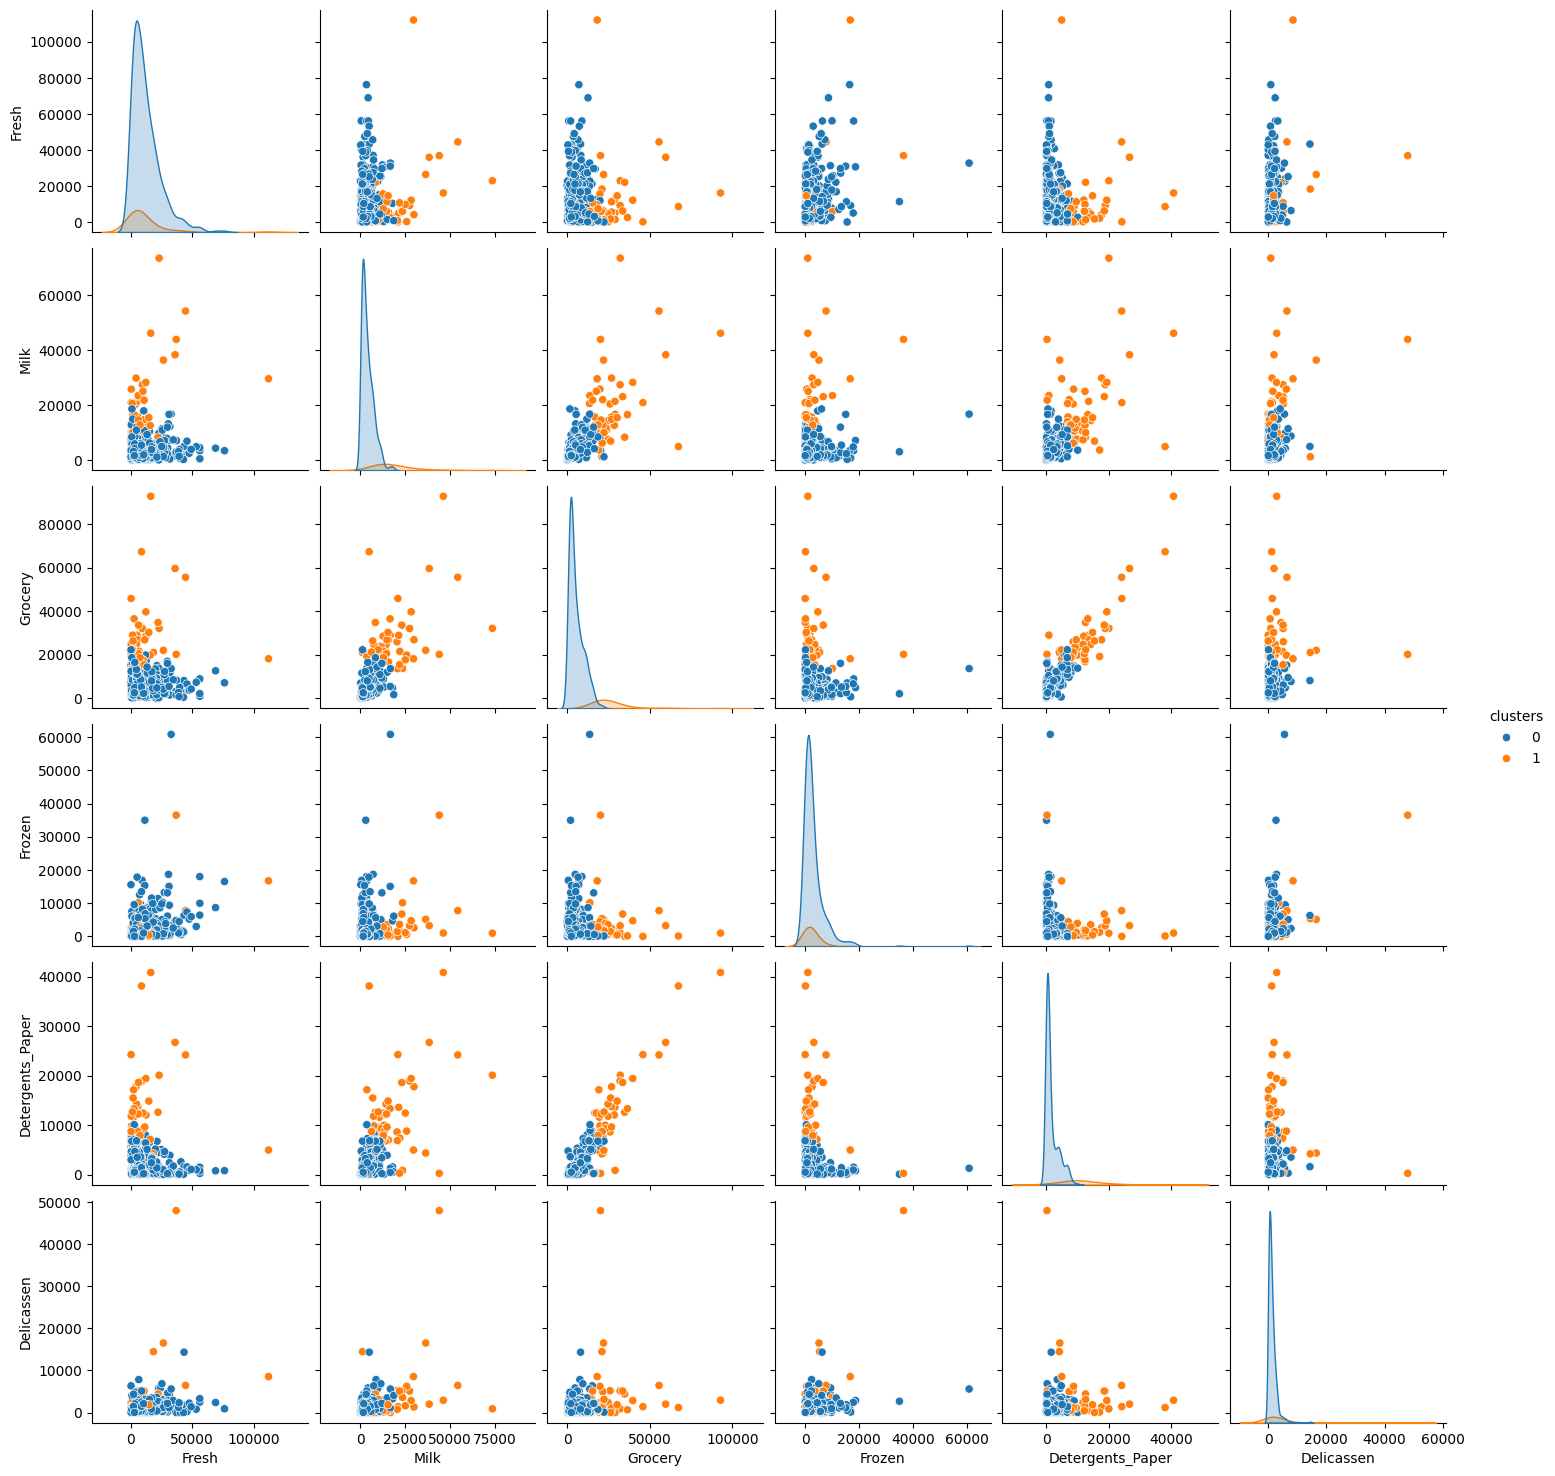

In [12]:
import seaborn as sn
sn.pairplot(df, hue = "clusters")

In [20]:
df.drop(["clusters"], axis = 1, inplace = True)

In [21]:
distorions = []
spread = range(1,26)

for k in spread:
    model = KMeans(n_clusters=k, tol=0.01, random_state=0)
    model.fit(X)
    distorions.append(model.inertia_)

print(distorions)

[2640.0, 1956.2121726417934, 1657.9678603942561, 1357.09733767612, 1061.0752298382633, 945.7977746164784, 854.4314136718497, 767.8058228960676, 666.2615712884809, 638.6783450843769, 596.8785597444347, 530.2415345503647, 492.14568790597696, 475.5677641745759, 463.76705092145323, 425.8767938488175, 394.30973816511175, 369.45399968643744, 357.90381381839, 338.1230087876308, 311.61354629779873, 294.1368896233382, 281.8604136943192, 272.56082340959273, 261.8554727753765]


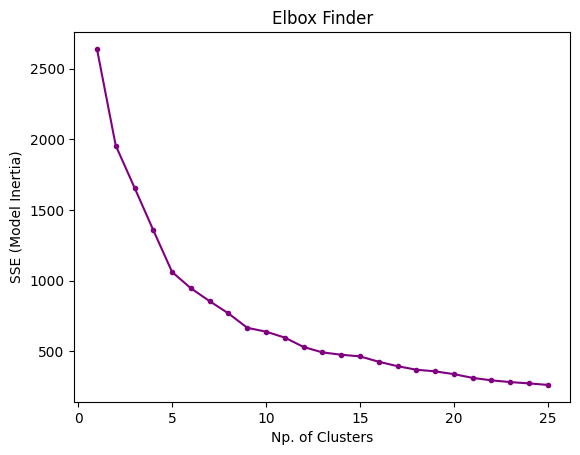

In [22]:
import matplotlib.pyplot as plt
plt.plot(spread, distorions, marker = ".", c="purple")
plt.title("Elbox Finder")
plt.xlabel("Np. of Clusters")
plt.ylabel("SSE (Model Inertia)")
plt.show()

In [23]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5, tol=0.01, random_state=0).fit_predict(X)

In [25]:
print(clusters)

[2 3 3 2 0 2 2 2 2 3 3 2 0 3 3 2 3 2 2 2 2 2 0 1 3 2 2 2 3 0 2 2 2 0 2 3 0
 3 3 0 0 2 3 3 3 3 3 1 3 3 2 2 0 3 2 2 1 3 2 2 2 1 2 3 2 1 2 3 2 2 0 0 2 0
 2 2 2 3 2 2 2 3 3 2 2 1 1 0 2 0 2 2 1 0 3 2 2 2 2 2 3 3 2 0 2 2 3 3 2 3 2
 3 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 3 2 2
 2 0 2 2 2 2 2 3 3 2 3 3 3 2 2 3 2 3 3 2 2 2 3 3 2 3 2 3 0 2 2 2 2 0 3 4 2
 2 2 2 3 3 2 2 2 3 2 0 0 3 2 2 3 3 0 2 2 3 2 2 2 3 2 1 2 2 3 3 3 2 3 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 3 3 2 2 2 2 2 1 2 0 3 0 2 2 0
 0 2 2 2 2 3 3 3 2 3 2 2 2 2 0 2 2 0 0 2 2 2 2 0 0 0 0 2 2 2 0 2 2 2 3 2 2
 2 2 2 2 2 3 3 3 3 3 3 2 2 3 2 0 3 2 2 3 2 2 2 3 2 2 2 2 2 0 2 2 2 2 2 3 2
 1 0 0 2 2 2 2 3 3 2 3 2 2 3 0 2 3 2 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 3 0 2 2 0 0 0 2 3 2 2 2 2 2 2 2 2 0 2 2 3 2 2 2 2 0 2 2 2 2 0
 3 2 2 2 2 2 0 2 2 3 2 3 2 3 2 2 2 2 0 3 0 2 2 2 0 2 2 2 0 0 3 2 2]


In [27]:
df["clusters"] = clusters.tolist()

In [28]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,3
438,10290,1981,2232,1038,168,2125,2


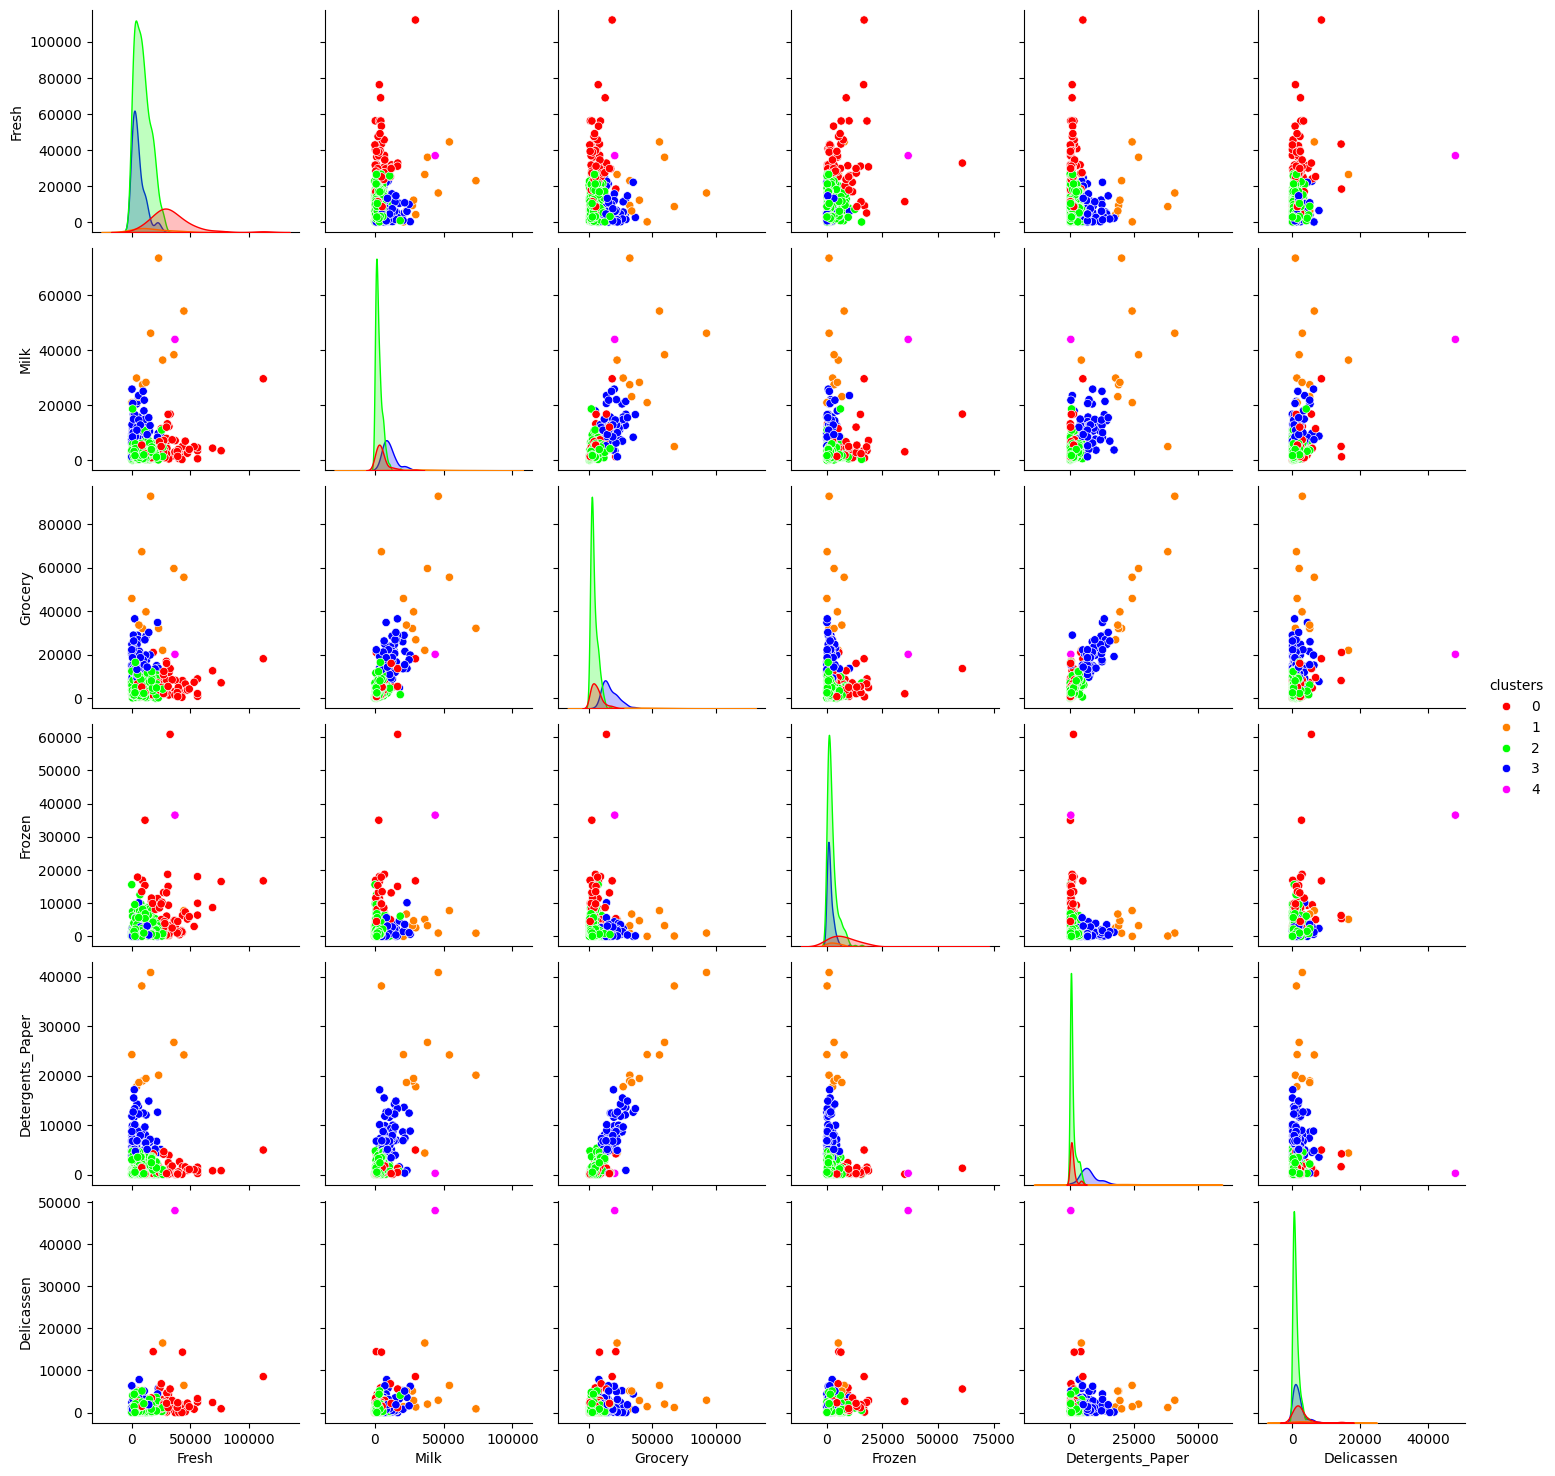

In [31]:
import seaborn as sn
custom_palette = ["#FF0000", "#FF8000", "#00FF00", "#0000FF", "#FF00FF"]  # Red, Green, Blue
sn.pairplot(df, hue = "clusters", palette=custom_palette)

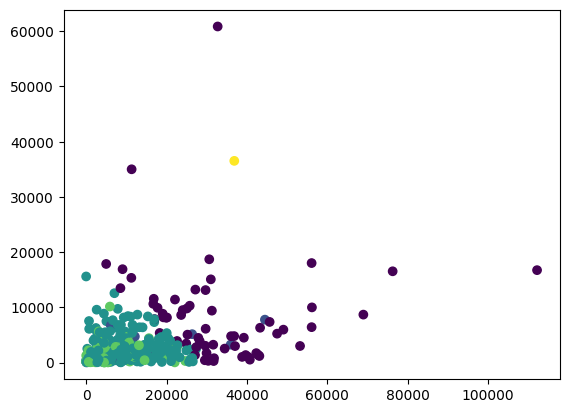

In [34]:
plt.scatter(df["Fresh"],df["Frozen"], c=df.clusters)

# Step 6

Challenge Yourself (Optional)
Repeat step 6 for Hierarchical Clustering.

In [37]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters = 5, linkage="ward")

clusters = agg_cluster.fit_predict(X)

In [38]:
df["clusters_agg"] = clusters.tolist()

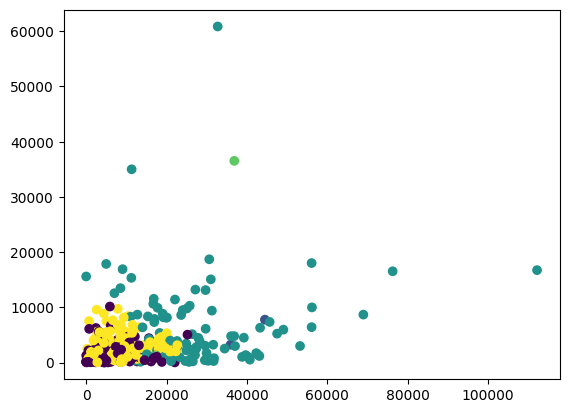

In [39]:
plt.scatter(df["Fresh"],df["Frozen"], c=df.clusters_agg)